In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string 

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')
twiter = pd.read_csv("traintp.csv")

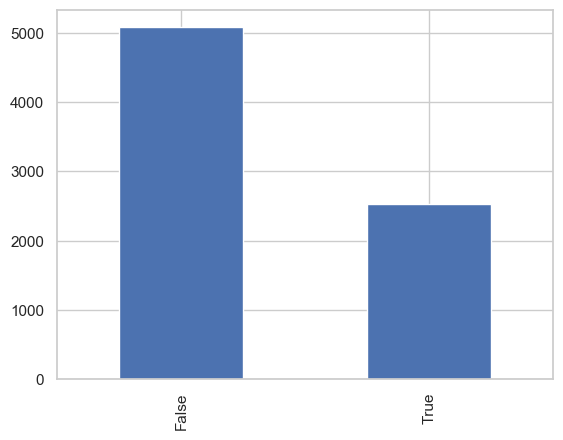

In [2]:
twiter_location=twiter[{"location","text","target"}]
twiter_location["long_text_location"]=twiter["text"].str.len()
#twiter que poseen locacion
twiter_location["location_isnull"]=twiter_location["location"].isnull()
twiter_location["location"].isnull().value_counts().plot(kind="bar")

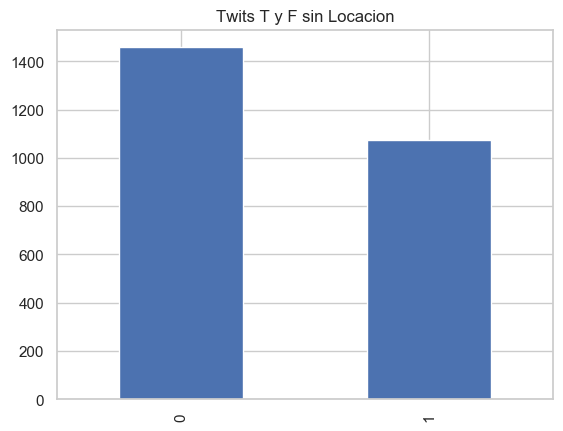

In [3]:
#Quiero analizar de aquellos textos sin locacion cuantos son verdaderos
twiter_with_location=twiter_location.loc[twiter_location.location_isnull==True]
twiter_with_location.target.value_counts().plot(kind="bar",title="Twits T y F sin Locacion")

In [4]:
twiter_location_level=twiter_location.groupby(["location_isnull","target"]).agg({"target":"count"})
twiter_location_level

target
location_isnull target        
False           0         2884
                1         2196
True            0         1458
                1         1075

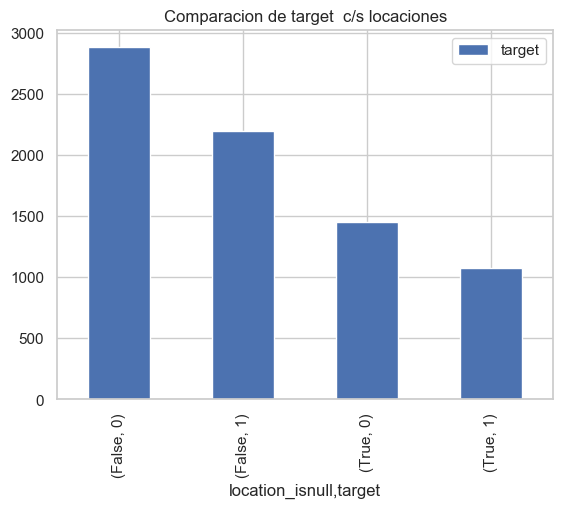

In [5]:
twiter_location_level.plot(kind="bar",title="Comparacion de target  c/s locaciones")

In [6]:
#locaciones que parece entar bien escritas
#funcion prueba para ver si hay algun caracter especial que me indique aproximadamente si una locacion es valida o no
def caracterSpecialEnLocacion(x):
    caracteres_especiales={"å_","?","@","_","å"}
    contiene=False
    if ("¿" in x )or ("Ì" in x ) or ("@" in x ) or ("_" in x ) or ("?" in x ) or ("!" in x )or ("|" in x )or ("{ " in x )\
    or ("¡" in x )or ("(" in x ) or ("å" in x ) or ("%" in x ) or ("&" in x ) or ("¢" in x )\
    or ("¢" in x ):
        contiene=True
    return contiene

In [12]:
#vFiltro twits con locaciones y analizo si alguna de ellas poseen algun caracter especial
twiter_location_new=twiter_location.loc[twiter_location.location_isnull == False]
twiter_location_new["caracterSpecialEnLocacion"]=twiter_location_new.location.transform(caracterSpecialEnLocacion)
twiter_location_new.loc[twiter_location_new.caracterSpecialEnLocacion == False].location.value_counts()

USA                     104
New York                 71
United States            50
London                   45
Canada                   29
                       ... 
Near Yosemite             1
Hailing from Dayton       1
new york, ny              1
Atlanta Georgia           1
Chicago, IL               1
Name: location, Length: 2957, dtype: int64

In [10]:
twiter_location_con_locacion_caracter=twiter_location_con_locacion.groupby(["caracterSpecialEnLocacion","target"]).\
agg({"target":"count"})
twiter_location_con_locacion_caracter

target
caracterSpecialEnLocacion target        
False                     0         2612
                          1         2047
True                      0          272
                          1          149

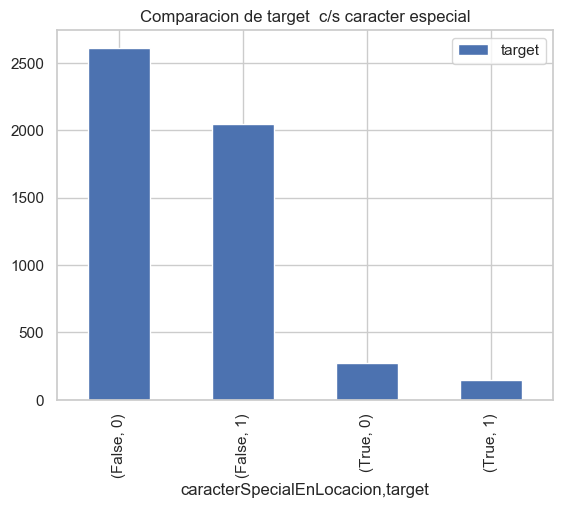

In [11]:
twiter_location_con_locacion_caracter.plot(kind="bar",title="Comparacion de target  c/s caracter especial")

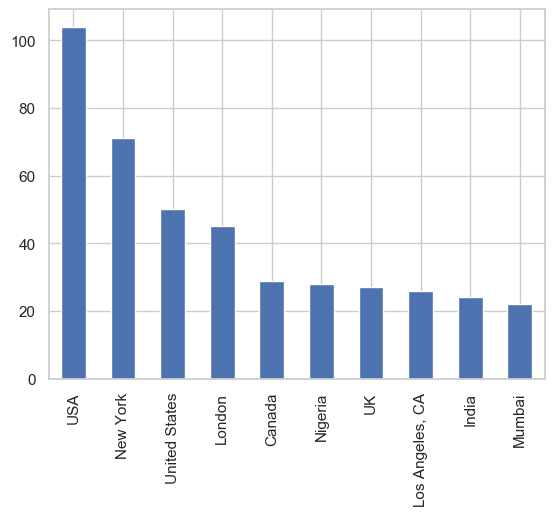

In [25]:
#Locaciones en donde mas se miente
twiter_location_new.loc[twiter_location_new.caracterSpecialEnLocacion == False].location.value_counts().head(10).plot(kind="bar")